# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: 10__

__Nombres de los estudiantes: Francisco de Borja Lozano del Moral y Manuel Ortega Salvador__

Incluimos primero todas las importaciones.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.datasets import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [2]:
#Fijamos el random state
RANDOM_STATE = 666

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `countries_of_the_world.csv` que se proporciona junto con la práctica. Usa como índice el nombre de los países. 

Vamos a eliminar la columna `Region` por ser categórica y todas las filas en las que faltan valores usando la operación `dropna`.

Muestra el dataframe resultante y explica cuántos países y variables contiene.

In [3]:
#Creamos el dataframe, y hacemos que los países hagan de índice.
df = pd.read_csv("countries_of_the_world.csv",index_col=0)
#Quitamos la columna Region.
df = df.drop(['Region'],axis=1)
#Quitamos toda fila a la que le falte información.
df = df.dropna(axis=0)
df

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393


In [4]:
df.shape

(179, 18)

Como se indica, en el dataframe tenemos 179 países, para cada uno de los cuales se tienen 18 variables de información.

## 2) Análisis de los datos

En este notebook vamos a trabajar con un subconjunto de las variables. Crea un nuevo dataframe que sólo contenga las variables `GDP ($ per capita)`, `Literacy (%)`, `Phones (per 1000)`, `Agriculture`, `Industry` y `Service`. ¿Qué crees que representan cada una de esas variables?

Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [5]:
df2 = pd.read_csv("countries_of_the_world.csv",index_col=0, usecols=['Country','GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Agriculture','Industry','Service'])
df2 = df2.dropna(axis=0)
df2

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
Country,,,,,,
Afghanistan,700.0,36.0,3.2,0.380,0.240,0.380
Albania,4500.0,86.5,71.2,0.232,0.188,0.579
Algeria,6000.0,70.0,78.1,0.101,0.600,0.298
Angola,1900.0,42.0,7.8,0.096,0.658,0.246
Anguilla,8600.0,95.0,460.0,0.040,0.180,0.780
...,...,...,...,...,...,...
Venezuela,4800.0,93.4,140.1,0.040,0.419,0.541
Vietnam,2500.0,90.3,187.7,0.209,0.410,0.381
Yemen,800.0,50.2,37.2,0.135,0.472,0.393


Para cada país, se indica su PIB, el porcentaje de la población que sabe leer y escribir, el número de teléfonos móviles en uso por cada 1000 habitantes, así el cómo está distribuido el PIB entre los tres sectores de agricultura, industria y servicios.

Ahora vemos los descriptores estadísticos de las variables.

In [6]:
df2.describe(include='all')

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,9391.836735,82.285714,213.407143,0.154219,0.288597,0.556679
std,10108.571366,19.829721,208.316500,0.149170,0.139607,0.164649
min,500.000000,17.600000,0.200000,0.000000,0.032000,0.062000
25%,1875.000000,70.300000,29.950000,0.038000,0.199500,0.425750
50%,5250.000000,91.150000,141.500000,0.100500,0.274500,0.561500
75%,13300.000000,97.925000,337.400000,0.227750,0.350500,0.671500
max,55100.000000,100.000000,898.000000,0.769000,0.906000,0.954000


Primero de todo, gracias a los valores de min y max, así como los percentiles, nos hacemos una idea del rango de cada una de las variables y cómo están distribuidas.

Con la media (mean) vemos que de los tres sectores, de media el sector servicios corresponde algo más de la mitad del PIB. También tenemos que de media, solamente menos de la cuarta parte de cada 1000 habitantes dispone de teléfono móvil, así como que la media del porcentaje de alfabetismo es poco más de un 80%.

Por último tenemos que la desviación típica (std) es muy alta en el PIB (GDP) y en Teléfonos/1000 habitantes, seguramente debida a la gran diferencia entre los países que están muy desarrollados frente a los que lo están menos.

Vemos ahora los histogramas de cada variable para ver de forma más visual cómo está distribuida cada una.

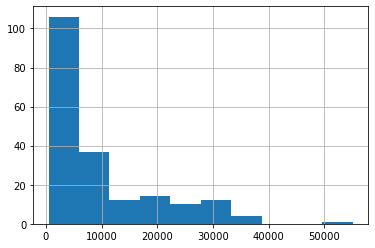

In [7]:
df2['GDP ($ per capita)'].hist()

Vemos que la gran mayoría de los países tienen un GDP inferior a 10000$. Por encima de ese valor tenemos una distribución bastante estable.

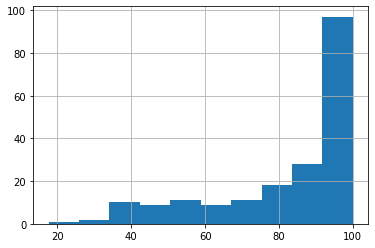

In [8]:
df2['Literacy (%)'].hist()

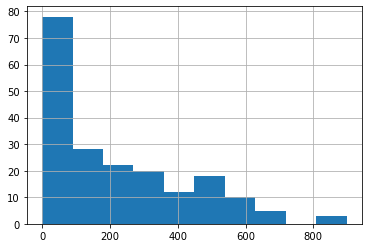

In [9]:
df2['Phones (per 1000)'].hist()

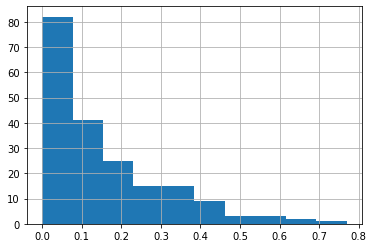

In [10]:
df2['Agriculture'].hist()

Cabe destacar lo similares que son entre sí las distribuciones de GDP, Phones y Agriculture.

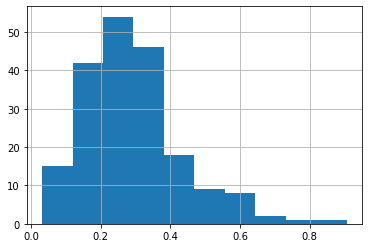

In [11]:
df2['Industry'].hist()

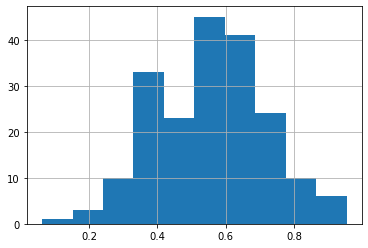

In [12]:
df2['Service'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B27133AD30>,
      dtype=object)

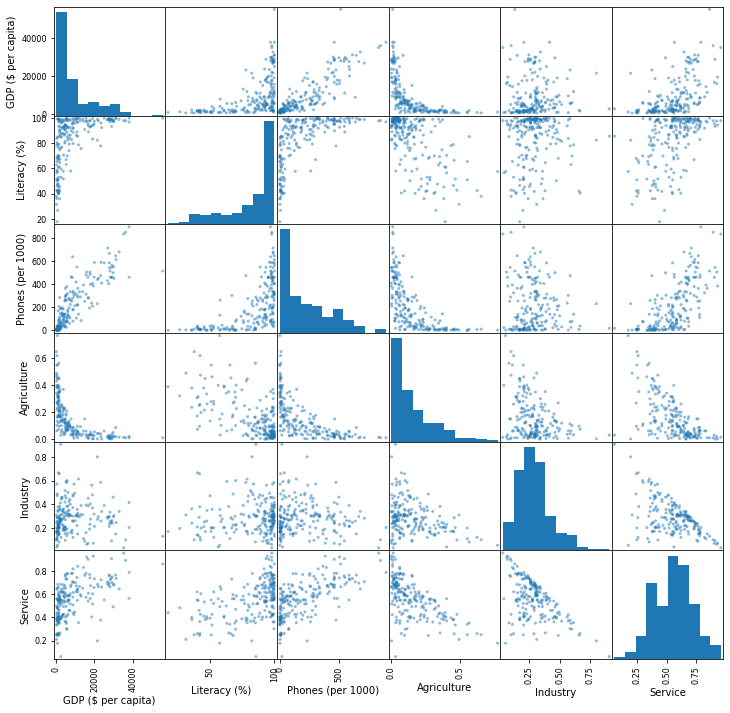

In [13]:
scatter_matrix(df2, figsize = (12, 12), diagonal = 'hist')

In [14]:
df2.corr(method='pearson')

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
GDP ($ per capita),1.000000,0.512422,0.859845,-0.607990,0.003426,0.548692
Literacy (%),0.512422,1.000000,0.606059,-0.615412,0.065220,0.499638
Phones (per 1000),0.859845,0.606059,1.000000,-0.639759,-0.099627,0.665395
Agriculture,-0.607990,-0.615412,-0.639759,1.000000,-0.347812,-0.609954
Industry,0.003426,0.065220,-0.099627,-0.347812,1.000000,-0.529808
Service,0.548692,0.499638,0.665395,-0.609954,-0.529808,1.000000


Vemos que las tres variables Agricultura, Industria y Servicios tienen una correlación inversa entre ellas, especialmente grande entre Agricultura y Servicios.

También cabe destacar la correlación inversa entre el GDP y Agricultura, así como la directa entre las variables GDP, Literacy, Teléfonos y Servicios.

## 3) Preprocesar los datos

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de países similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

Dado que hemos visto que hay una gran diferencia en el rango (Alfabetismo está entre 0 y 100; Servicios, Agricultura e Industria están entre 0 y 1; PIB y Teléfonos tienen una cota superior que está en los miles) y la desviación típica de algunas de las variables (especialmente el PIB y Teléfonos respecto de las demás), va a ser necesario reescalar  los datos para que el algoritmo de k-Means nos dé buenos resultados.

Vamos a reescalarlos, ya que, como se puede ver en los histogramas de cada variable, la mayoría no parece que sigan una distrubución normal. Para ello emplearemos MinMaxScaler de forma que reduciremos las grandes diferencias en los rangos de nuestras variables.

In [15]:
#Reescalamos (normalizamos) los datos
scaler = MinMaxScaler()
scaler.fit(df2)
df2_scaled = scaler.transform(df2)

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo, el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

In [16]:
def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','k','m',]
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()

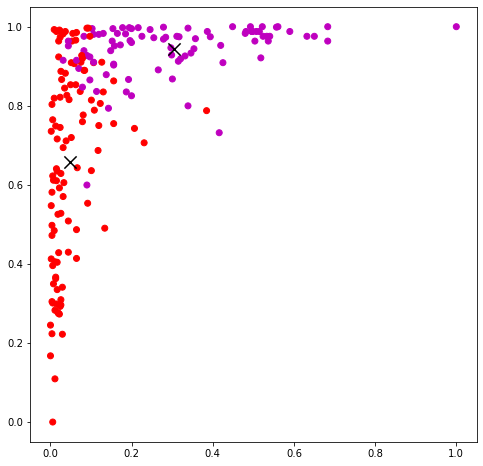

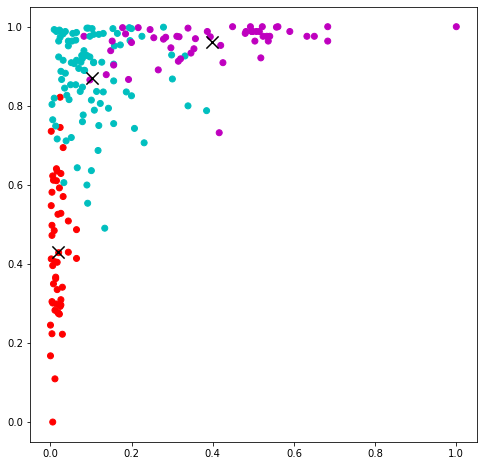

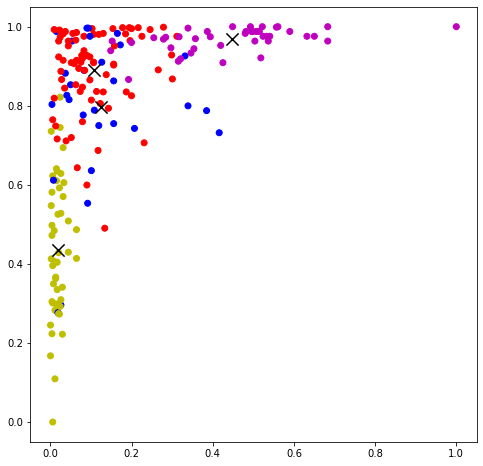

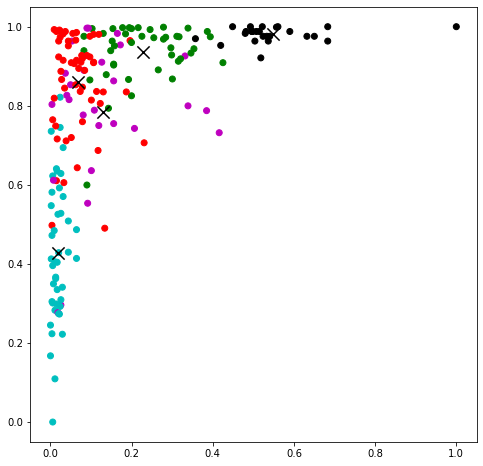

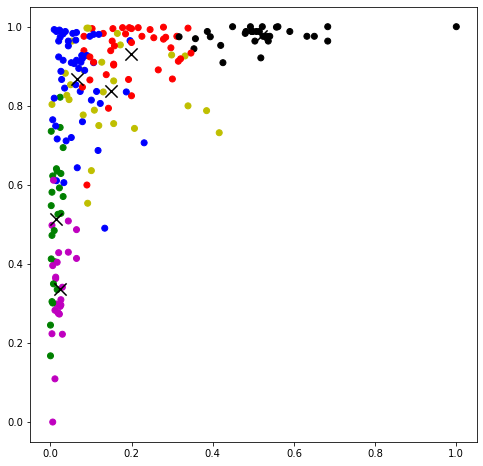

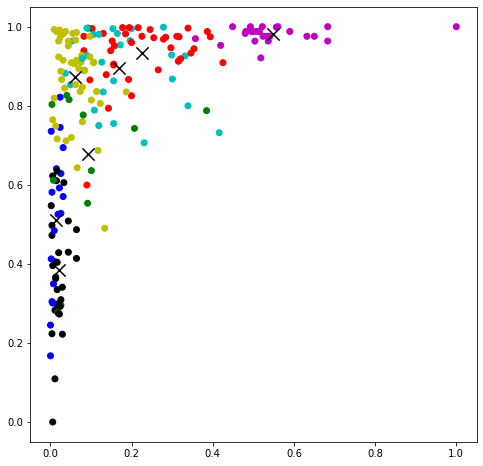

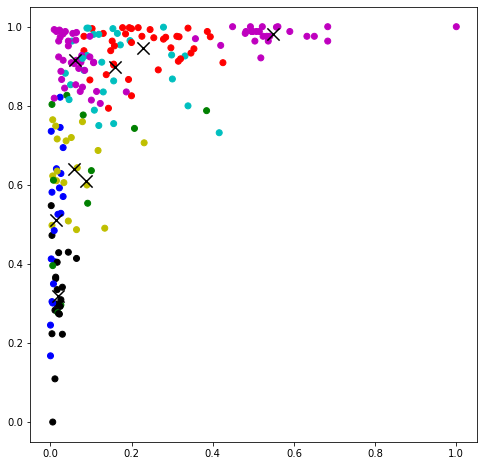

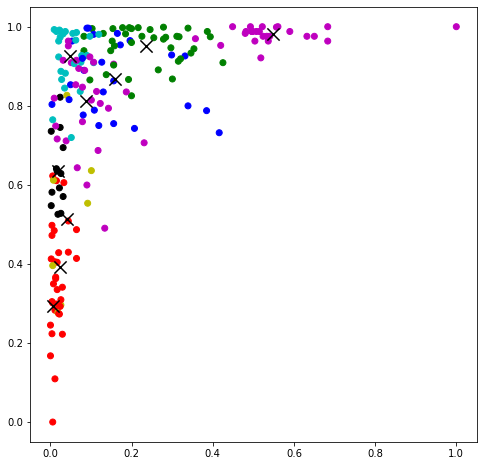

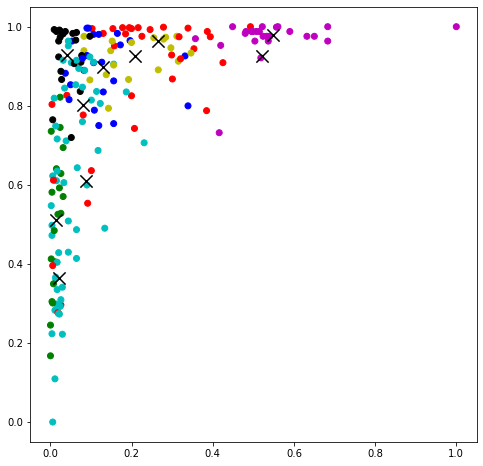

In [17]:
K_MAX = 11
score = np.zeros(K_MAX-2)
davies_boulding = np.zeros(K_MAX-2)
silhouette = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=RANDOM_STATE)
    km.fit(df2_scaled)
    plot_clusters(df2_scaled, km.labels_, km.cluster_centers_)
    
    score[k-2] = -1 * km.score(df2_scaled)
    davies_boulding[k-2] = davies_bouldin_score(df2_scaled, km.labels_)
    silhouette[k-2] = silhouette_score(df2_scaled, km.labels_)

Pintamos el diagrama del codo.

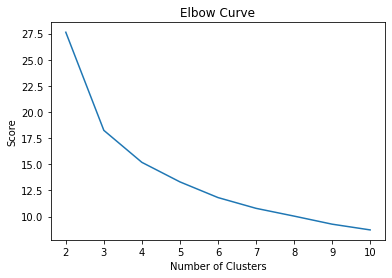

In [18]:
plt.plot(range(2, K_MAX), score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Como se ve en la gráfica de arriba, tenemos un codo en k=3, y otro en k=4.

Pintamos los valores de Davies Boulding.

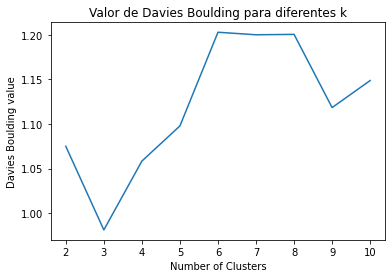

In [19]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding value')
plt.title('Valor de Davies Boulding para diferentes k')
plt.show()

Vemos en la gráfica de arriba que los valores de Davies Boulding más pequeños los obtenemoss para k=2,3,4 clusters, siendo 3 el menor de ellos.

Pintamos los coeficientes de silhouette.

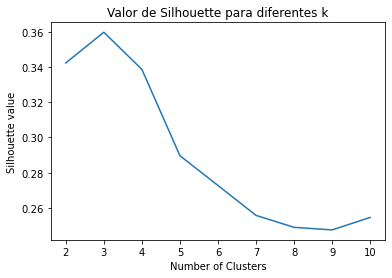

In [20]:
plt.plot(range(2, K_MAX), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette value')
plt.title('Valor de Silhouette para diferentes k')
plt.show()

De nuevo, viendo la gráfica de arriba tenemos que los mejores valores de silhouette son para k=2,3,4 clusters, siendo para k=3 el mejor.

Juntando lo visto en las tres gráficas anteriores, está claro que los mejores valores se dan para el valor k=3 clusters en cada una de las gráficas, por lo que aparentemente este es el número óptimo de clusters.

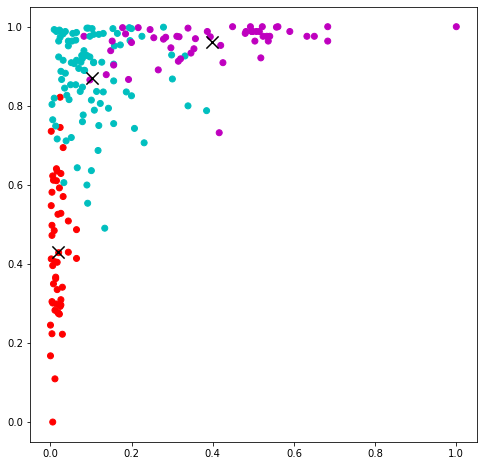

In [21]:
km = KMeans(init='random', n_clusters=3, random_state=RANDOM_STATE)
km.fit(df2_scaled)
plot_clusters(df2_scaled, km.labels_, km.cluster_centers_)

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior y trata identificar el grupo de países que contienen. Si te han salido más de 3 elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar kMeans con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

Vamos a crear un nuevo dataframe con los datos originales (sin reescalar), sumando la columna del cluster al que pertenece cada individuo, los cuales se han obtenido antes al ejecutar el algoritmo de k-Means a los datos reescalados.

In [22]:
df2_cluster = pd.DataFrame(data=df2_scaled, columns=['GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Agriculture','Industry','Service'])
#Cambiamos las columnas del reescalado por las del original
df2_cluster['GDP ($ per capita)'] = list(df2['GDP ($ per capita)'])
df2_cluster['Literacy (%)'] = list(df2['Literacy (%)'])
df2_cluster['Phones (per 1000)'] = list(df2['Phones (per 1000)'])
df2_cluster['Agriculture'] = list(df2['Agriculture'])
df2_cluster['Service'] = list(df2['Service'])
df2_cluster['Industry'] = list(df2['Industry'])
# añadir una columna con el cluster al que pertenece cada punto
df2_cluster = df2_cluster.assign(cluster=pd.Series(data=km.labels_))
df2_cluster

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service,cluster
0,700.0,36.0,3.2,0.380,0.240,0.380,0
1,4500.0,86.5,71.2,0.232,0.188,0.579,1
2,6000.0,70.0,78.1,0.101,0.600,0.298,1
3,1900.0,42.0,7.8,0.096,0.658,0.246,0
4,8600.0,95.0,460.0,0.040,0.180,0.780,2
...,...,...,...,...,...,...,...
191,4800.0,93.4,140.1,0.040,0.419,0.541,1
192,2500.0,90.3,187.7,0.209,0.410,0.381,1
193,800.0,50.2,37.2,0.135,0.472,0.393,0
194,800.0,80.6,8.2,0.220,0.290,0.489,1


Ahora vamos a sacar los descriptores estadísticos de cada una de las variables y respecto a cada uno de los clusters.

In [23]:
df2_cluster.groupby(["cluster"]).describe().transpose()

cluster                             0             1             2
GDP ($ per capita) count    49.000000     93.000000     54.000000
                   mean   1451.020408   6106.451613  22255.555556
                   std     795.592664   4376.314870   9813.442199
                   min     500.000000    700.000000   5000.000000
                   25%     800.000000   2900.000000  15175.000000
                   50%    1300.000000   5000.000000  22600.000000
                   75%    1800.000000   7600.000000  28750.000000
                   max    4000.000000  21500.000000  55100.000000
Literacy (%)       count    49.000000     93.000000     54.000000
                   mean     53.014286     89.335484     96.705556
                   std      14.425542      9.346676      3.927043
                   min      17.600000     58.000000     77.900000
                   25%      42.200000     84.000000     95.725000
                   50%      51.600000     92.300000     98.000000
                   75%      64.600000     97.100000     99.000000
                   max      85.300000     99.900000    100.000000
Phones (per 1000)  count    49.000000     93.000000     54.000000
                   mean     15.148980    153.443011    496.579630
                   std      20.487223     95.342380    138.403538
                   min       0.200000      3.700000    194.500000
                   25%       3.600000     74.700000    407.425000
                   50%       9.300000    137.900000    463.200000
                   75%      16.300000    232.000000    562.175000
                   max     131.800000    340.700000    898.000000
Agriculture        count    49.000000     93.000000     54.000000
                   mean      0.341776      0.124602      0.035037
                   std       0.149210      0.083953      0.030610
                   min       0.073000      0.002000      0.000000
                   25%       0.250000      0.061000      0.015500
                   50%       0.335000      0.112000      0.029000
                   75%       0.432000      0.172000      0.042250
                   max       0.769000      0.370000      0.150000
Industry           count    49.000000     93.000000     54.000000
                   mean      0.242041      0.340258      0.241870
                   std       0.131800      0.142797      0.108023
                   min       0.040000      0.096000      0.032000
                   25%       0.170000      0.243000      0.172500
                   50%       0.209000      0.312000      0.252000
                   75%       0.290000      0.419000      0.295750
                   max       0.666000      0.906000      0.585000
Service            count    49.000000     93.000000     54.000000
                   mean      0.416306      0.534129      0.722889
                   std       0.120682      0.125753      0.108831
                   min       0.177000      0.062000      0.375000
                   25%       0.350000      0.439000      0.667750
                   50%       0.401000      0.550000      0.724000
                   75%       0.520000      0.614000      0.768250
                   max       0.643000      0.778000      0.954000

Fijándonos sobre todo en la media y los rangos de las variables, tenemos que:

*Cluster 0*: es el de menor PIB (GDP) de los 3 (entre 500 y 4000), el porcentaje medio de población que sabe leer y escribir está en poco más del 50% (bastante bajo) y el número medio de télefonos es solamente de 15 por cada 1000 habitantes. Además es el cluster que presenta mayor media de Agricultura de los 3, representando esta casi un 35% del PIB, además de una media de casi 25% del PIB en Industria y 41% en Servicios (de nuevo es el cluster con ese valor más pequeño).

*Cluster 1*: es el segundo respecto al valor de PIB (GDP, estando este entre 700 y 21500, y con una media de  6106 dólares. Tiene una media de casi el 90% de población que sabe leer y escribir (mucho mayor que el cluster 0), y de nuevo es el segundo respecto a la media de teléfonos cada 1000 habitantes, con un valor alrededor de 153. Por último, es la segunda respecto al valor de Agricultura y Servicios, siendo además la que de media tiene un mayor valor de Industria de los tres clusters, siendo este un 34% del PIB (un 10% más que los otros dos clusters).

*Cluster 2*: es el de mayor PIB (GDP) con diferencia de los 3, con un rango entre 5000 y 55100, y una media de 22255 dólares. También es el de mayor porcetaje de población que sabe leer y escribir, con una media del 96% (solo el 25% de los países en este cluster están por debajo del valor de 95% de alfabetismo), así como que de media hay un teléfono móvil cada 2 habitantes. Es el que presenta el menor porcentaje de Agricultura en el PIB, un 3% (muy bajo en comparación con los otros dos clusters), pero es el que más presenta de Servicios, con un 72% de media. Respecto a Industria presenta una media prácticamente igual a la del cluster 0. 


Vemos que entre los tres clusters hay una clara relación en los valores de PIB, Literacy, Phones y Servicios: el cluster 0 presenta valores más bajos de estas variables, el cluster 1 presenta (en general) valores intermedios, y el cluster 2 presenta valores muy altos de estas variables. Lo inverso sucede con agricultura, en el que es mayor en el cluster 0, intermedio/bajo en el 1, y muy bajo en el 2.

Con esto, podemos pensar que cada uno de los clusters representa una posible división de los países en función de su desarrollo, siendo el cluster 0 los países subdesarrollados, el cluster 1 los países en vías de desarrollo, y el cluster 1 los países desarrollados.

Vamos a ver ahora el diagrama de dispersión en pares de variables y para cada cluster, empleando la librería seaborn.

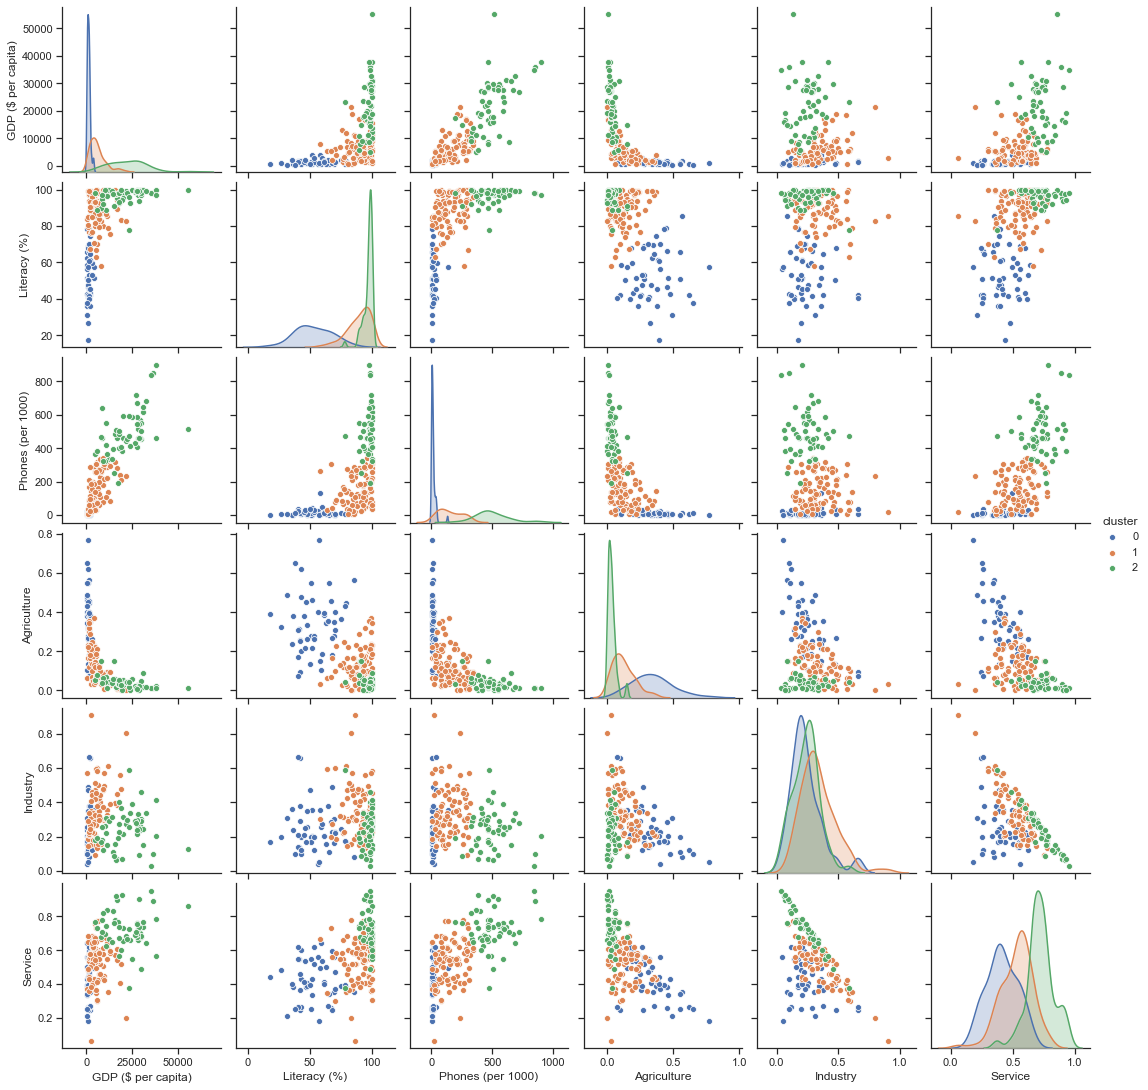

In [24]:
sns.set(style="ticks")
sns.pairplot(df2_cluster, hue="cluster", vars = ['GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Agriculture','Industry','Service'])

Vemos que los clusters 0 y 2 son los que mejor se distinguen, sobre todo en las variables de PIB (GDP), Literacy, Teléfonos, Agricultura y Servicios, ya que como vimos en los valores de estas variables, ambos suponen extremos muy opuestos en la mayoría de esas variables.

El cluster 1 parece un paso intermedio entre el 0 y el 2, ya que se puede apreciar en el histograma de cada variable como este se superpone en cierta medida con los otros, estando siempre entre ambos.